#Initialization

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download CICIDS2017 dataset

In [ ]:

!kaggle datasets download -d cicdataset/cicids2017
!unzip cicids2017.zip

 98% 226M/230M [00:02<00:00, 99.6MB/s]
100% 230M/230M [00:02<00:00, 102MB/s] 
Archive:  cicids2017.zip
  inflating: MachineLearningCSV.md5  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  


Download CICIDS2018 dataset

In [ ]:
!kaggle datasets download -d solarmainframe/ids-intrusion-csv
!mkdir IDS_2018

!unzip ids-intrusion-csv.zip -x "02-20-2018.csv" -d ./IDS_2018/

 99% 1.59G/1.60G [00:17<00:00, 115MB/s]
100% 1.60G/1.60G [00:17<00:00, 100MB/s]
Archive:  ids-intrusion-csv.zip
  inflating: ./IDS_2018/02-14-2018.csv  
  inflating: ./IDS_2018/02-15-2018.csv  
  inflating: ./IDS_2018/02-16-2018.csv  
  inflating: ./IDS_2018/02-21-2018.csv  
  inflating: ./IDS_2018/02-22-2018.csv  
  inflating: ./IDS_2018/02-23-2018.csv  
  inflating: ./IDS_2018/02-28-2018.csv  
  inflating: ./IDS_2018/03-01-2018.csv  
  inflating: ./IDS_2018/03-02-2018.csv  


# Libraries


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
plt.style.use('fivethirtyeight')
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from imblearn.under_sampling import RandomUnderSampler,NearMiss,EditedNearestNeighbours
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.neural_network import MLPClassifier
import pickle

# Dataset
We read and concatenate the individual DataFrames


**IDS-2017** 

In [ ]:
data_frames = []
for dirname, _, filenames in os.walk('/content/MachineLearningCSV/MachineLearningCVE'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data_frames.append(pd.read_csv(os.path.join(dirname, filename)))

/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/content/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


In [ ]:
import gc
df = pd.concat(data_frames)
for data_frame in data_frames:
    del data_frame
del data_frames
print(gc.collect())

11


**IDS-2018** 

In [ ]:
data_frames = []
for dirname, _, filenames in os.walk('/content/IDS_2018'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        data_frames.append(pd.read_csv(os.path.join(dirname, filename)))

/content/IDS_2018/02-28-2018.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/content/IDS_2018/02-21-2018.csv
/content/IDS_2018/03-02-2018.csv
/content/IDS_2018/02-23-2018.csv
/content/IDS_2018/02-14-2018.csv
/content/IDS_2018/02-16-2018.csv
/content/IDS_2018/03-01-2018.csv
/content/IDS_2018/02-15-2018.csv
/content/IDS_2018/02-22-2018.csv


In [ ]:
for i in range(0,9):
  data_frames[i] = data_frames[i][data_frames[i]['Dst Port'] != 'Dst Port'].astype(data_frames[1].dtypes.to_dict())

In [ ]:
import gc
df_2018 = pd.concat(data_frames)
for data_frame in data_frames:
    del data_frame
del data_frames
print(gc.collect())

0


# Decrease Memory Consumption

In [ ]:
def decrease_memory_consumption(df):
    #change the variable types for low memory usage
    #int64 to int32,,, float64 to float32 
    integer = []
    f = []
    for i in df.columns[:-1]:
        if df[i].dtype == "int64":
            integer.append(i)
        elif df[i].dtype == "float64":
            f.append(i)
        else:
            print("Skipping column of type", df[i].dtype)


    df[integer] = df[integer].astype("int32")
    df[f] = df[f].astype("float32")

In [ ]:
print("Memory consumption before: ", df.memory_usage().sum())
decrease_memory_consumption(df)
print("Memory consumption after: ", df.memory_usage().sum())

Memory consumption before:  1811675520
Memory consumption after:  928483704


In [ ]:
print("Memory consumption before: ", df_2018.memory_usage().sum())
decrease_memory_consumption(df_2018)
print("Memory consumption after: ", df_2018.memory_usage().sum())

Memory consumption before:  5368158360
Skipping column of type object
Memory consumption after:  2783489520


In [ ]:
df_2018_protocols = df_2018.Protocol.copy()

In [ ]:
df_2018.drop(['Protocol','Timestamp',],axis=1,inplace=True)

In [ ]:
df.drop([' Fwd Header Length.1'],axis=1,inplace=True)

In [ ]:
rename_dict = {}

In [ ]:
for i,j in zip(df.columns,df_2018.columns):
  rename_dict[i] = j

In [ ]:
rename_dict

{' ACK Flag Count': 'ACK Flag Cnt',
 ' Active Max': 'Active Max',
 ' Active Min': 'Active Min',
 ' Active Std': 'Active Std',
 ' Average Packet Size': 'Pkt Size Avg',
 ' Avg Bwd Segment Size': 'Bwd Seg Size Avg',
 ' Avg Fwd Segment Size': 'Fwd Seg Size Avg',
 ' Bwd Avg Bytes/Bulk': 'Bwd Byts/b Avg',
 ' Bwd Avg Packets/Bulk': 'Bwd Pkts/b Avg',
 ' Bwd Header Length': 'Bwd Header Len',
 ' Bwd IAT Max': 'Bwd IAT Max',
 ' Bwd IAT Mean': 'Bwd IAT Mean',
 ' Bwd IAT Min': 'Bwd IAT Min',
 ' Bwd IAT Std': 'Bwd IAT Std',
 ' Bwd PSH Flags': 'Bwd PSH Flags',
 ' Bwd Packet Length Mean': 'Bwd Pkt Len Mean',
 ' Bwd Packet Length Min': 'Bwd Pkt Len Min',
 ' Bwd Packet Length Std': 'Bwd Pkt Len Std',
 ' Bwd Packets/s': 'Bwd Pkts/s',
 ' Bwd URG Flags': 'Bwd URG Flags',
 ' CWE Flag Count': 'CWE Flag Count',
 ' Destination Port': 'Dst Port',
 ' Down/Up Ratio': 'Down/Up Ratio',
 ' ECE Flag Count': 'ECE Flag Cnt',
 ' Flow Duration': 'Flow Duration',
 ' Flow IAT Max': 'Flow IAT Max',
 ' Flow IAT Mean': 'Flow 

In [ ]:
df = df.rename(columns=rename_dict)

In [ ]:
labels_map = {
    'Benign': 'BENIGN',
    'DoS attacks-Hulk': 'DoS Hulk',
    'DoS attacks-SlowHTTPTest': 'DoS Slowhttptest',
    'DoS attacks-GoldenEye': 'DoS GoldenEye',
    'DoS attacks-Slowloris': 'DoS slowloris',
    'FTP-BruteForce': 'FTP-Patator',
    'SSH-Bruteforce': 'SSH-Patator',
}

In [ ]:
df_2018["Label"] = df_2018["Label"].apply(lambda x: x if x not in labels_map else labels_map[x])

In [ ]:
df.columns = df.columns.str.strip()

#Preprocessing


In [ ]:
def preprocess_dataset(dataset):
  #Drop the labels with count less than 5000
  labels_to_drop = dataset['Label'].value_counts()[dataset['Label'].value_counts() < 5000].index
  dataset = dataset[dataset['Label'].apply(lambda x: x not in labels_to_drop)]

  #Drop any duplicates if exisits and reset index
  dataset = dataset.drop_duplicates(keep="first")
  dataset.reset_index(drop=True,inplace=True)

  # drop nan and infinite rows
  # Below command is too ram heavy crashes the runtime
  #dataset = dataset[~dataset.isin([np.nan, np.inf, -np.inf]).any(1)]
  dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna()

  # drop one variable features 
  one_variable_list = []
  for i in dataset.columns:
      if dataset[i].value_counts().nunique() < 2:
          one_variable_list.append(i)
  dataset.drop(one_variable_list,axis=1,inplace=True)

  #feature reduction 
  #Drop highly correlated features 
  corr_matrix = dataset.corr().abs()

  # Select upper triangle of correlation matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find features with correlation greater than 0.95
  to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

  # Drop features 
  dataset =  dataset.drop(to_drop, axis=1)
  

  return dataset


In [ ]:
def preprocess_for_binary_classification(pre_processed_data):
  #define binary label 
  pre_processed_data['Binary Label'] = pre_processed_data['Label'].apply(lambda label: 'ATTACK' if label != 'BENIGN'  else 'BENIGN')

  #replace multiclass label with binary one
  multi_class_labels = pre_processed_data['Label'].copy()
  pre_processed_data['Label'] = pre_processed_data['Binary Label']
  pre_processed_data.drop(columns=['Binary Label'], inplace=True)
  
  return pre_processed_data, multi_class_labels

## List of extracted features and descriptions:


```
Feature Name				Description 

Flow duration			Duration of the flow in Microsecond
total Fwd Packet		Total packets in the forward direction
total Bwd packets		Total packets in the backward direction
total Length of Fwd Packet	Total size of packet in forward direction
total Length of Bwd Packet	Total size of packet in backward direction
Fwd Packet Length Min 		Minimum size of packet in forward direction
Fwd Packet Length Max 		Maximum size of packet in forward direction
Fwd Packet Length Mean		Mean size of packet in forward direction
Fwd Packet Length Std		Standard deviation size of packet in forward direction
Bwd Packet Length Min		Minimum size of packet in backward direction
Bwd Packet Length Max		Maximum size of packet in backward direction
Bwd Packet Length Mean		Mean size of packet in backward direction
Bwd Packet Length Std		Standard deviation size of packet in backward direction
Flow Bytes/s			Number of flow bytes per second
Flow Packets/s			Number of flow packets per second 
Flow IAT Mean			Mean time between two packets sent in the flow
Flow IAT Std			Standard deviation time between two packets sent in the flow
Flow IAT Max			Maximum time between two packets sent in the flow
Flow IAT Min			Minimum time between two packets sent in the flow
Fwd IAT Min			Minimum time between two packets sent in the forward direction
Fwd IAT Max			Maximum time between two packets sent in the forward direction
Fwd IAT Mean			Mean time between two packets sent in the forward direction
Fwd IAT Std			Standard deviation time between two packets sent in the forward direction
Fwd IAT Total   		Total time between two packets sent in the forward direction
Bwd IAT Min			Minimum time between two packets sent in the backward direction
Bwd IAT Max			Maximum time between two packets sent in the backward direction
Bwd IAT Mean			Mean time between two packets sent in the backward direction
Bwd IAT Std			Standard deviation time between two packets sent in the backward direction
Bwd IAT Total			Total time between two packets sent in the backward direction
Fwd PSH flags			Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
Bwd PSH Flags			Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
Fwd URG Flags			Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
Bwd URG Flags			Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
Fwd Header Length		Total bytes used for headers in the forward direction
Bwd Header Length		Total bytes used for headers in the backward direction
FWD Packets/s			Number of forward packets per second
Bwd Packets/s			Number of backward packets per second
Packet Length Min 		Minimum length of a packet
Packet Length Max		Maximum length of a packet
Packet Length Mean 		Mean length of a packet
Packet Length Std		Standard deviation length of a packet
Packet Length Variance  	Variance length of a packet
FIN Flag Count 			Number of packets with FIN
SYN Flag Count 			Number of packets with SYN
RST Flag Count 			Number of packets with RST
PSH Flag Count 			Number of packets with PUSH
ACK Flag Count 			Number of packets with ACK
URG Flag Count 			Number of packets with URG
CWR Flag Count 			Number of packets with CWR
ECE Flag Count 			Number of packets with ECE
down/Up Ratio			Download and upload ratio
Average Packet Size 		Average size of packet
Fwd Segment Size Avg 		Average size observed in the forward direction
Bwd Segment Size Avg 		Average number of bytes bulk rate in the backward direction
Fwd Bytes/Bulk Avg		Average number of bytes bulk rate in the forward direction
Fwd Packet/Bulk Avg		Average number of packets bulk rate in the forward direction
Fwd Bulk Rate Avg 		Average number of bulk rate in the forward direction
Bwd Bytes/Bulk Avg		Average number of bytes bulk rate in the backward direction
Bwd Packet/Bulk Avg 		Average number of packets bulk rate in the backward direction
Bwd Bulk Rate Avg		Average number of bulk rate in the backward direction
Subflow Fwd Packets		The average number of packets in a sub flow in the forward direction
Subflow Fwd Bytes		The average number of bytes in a sub flow in the forward direction
Subflow Bwd Packets		The average number of packets in a sub flow in the backward direction
Subflow Bwd Bytes		The average number of bytes in a sub flow in the backward direction
Fwd Init Win bytes		The total number of bytes sent in initial window in the forward direction
Bwd Init Win bytes		The total number of bytes sent in initial window in the backward direction
Fwd Act Data Pkts		Count of packets with at least 1 byte of TCP data payload in the forward direction
Fwd Seg Size Min		Minimum segment size observed in the forward direction
Active Min			Minimum time a flow was active before becoming idle
Active Mean			Mean time a flow was active before becoming idle
Active Max			Maximum time a flow was active before becoming idle
Active Std			Standard deviation time a flow was active before becoming idle
Idle Min			Minimum time a flow was idle before becoming active
Idle Mean			Mean time a flow was idle before becoming active
Idle Max			Maximum time a flow was idle before becoming active
Idle Std			Standard deviation time a flow was idle before becoming active
```





#Exploratory Data Analysis



In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plot_per_column_distribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


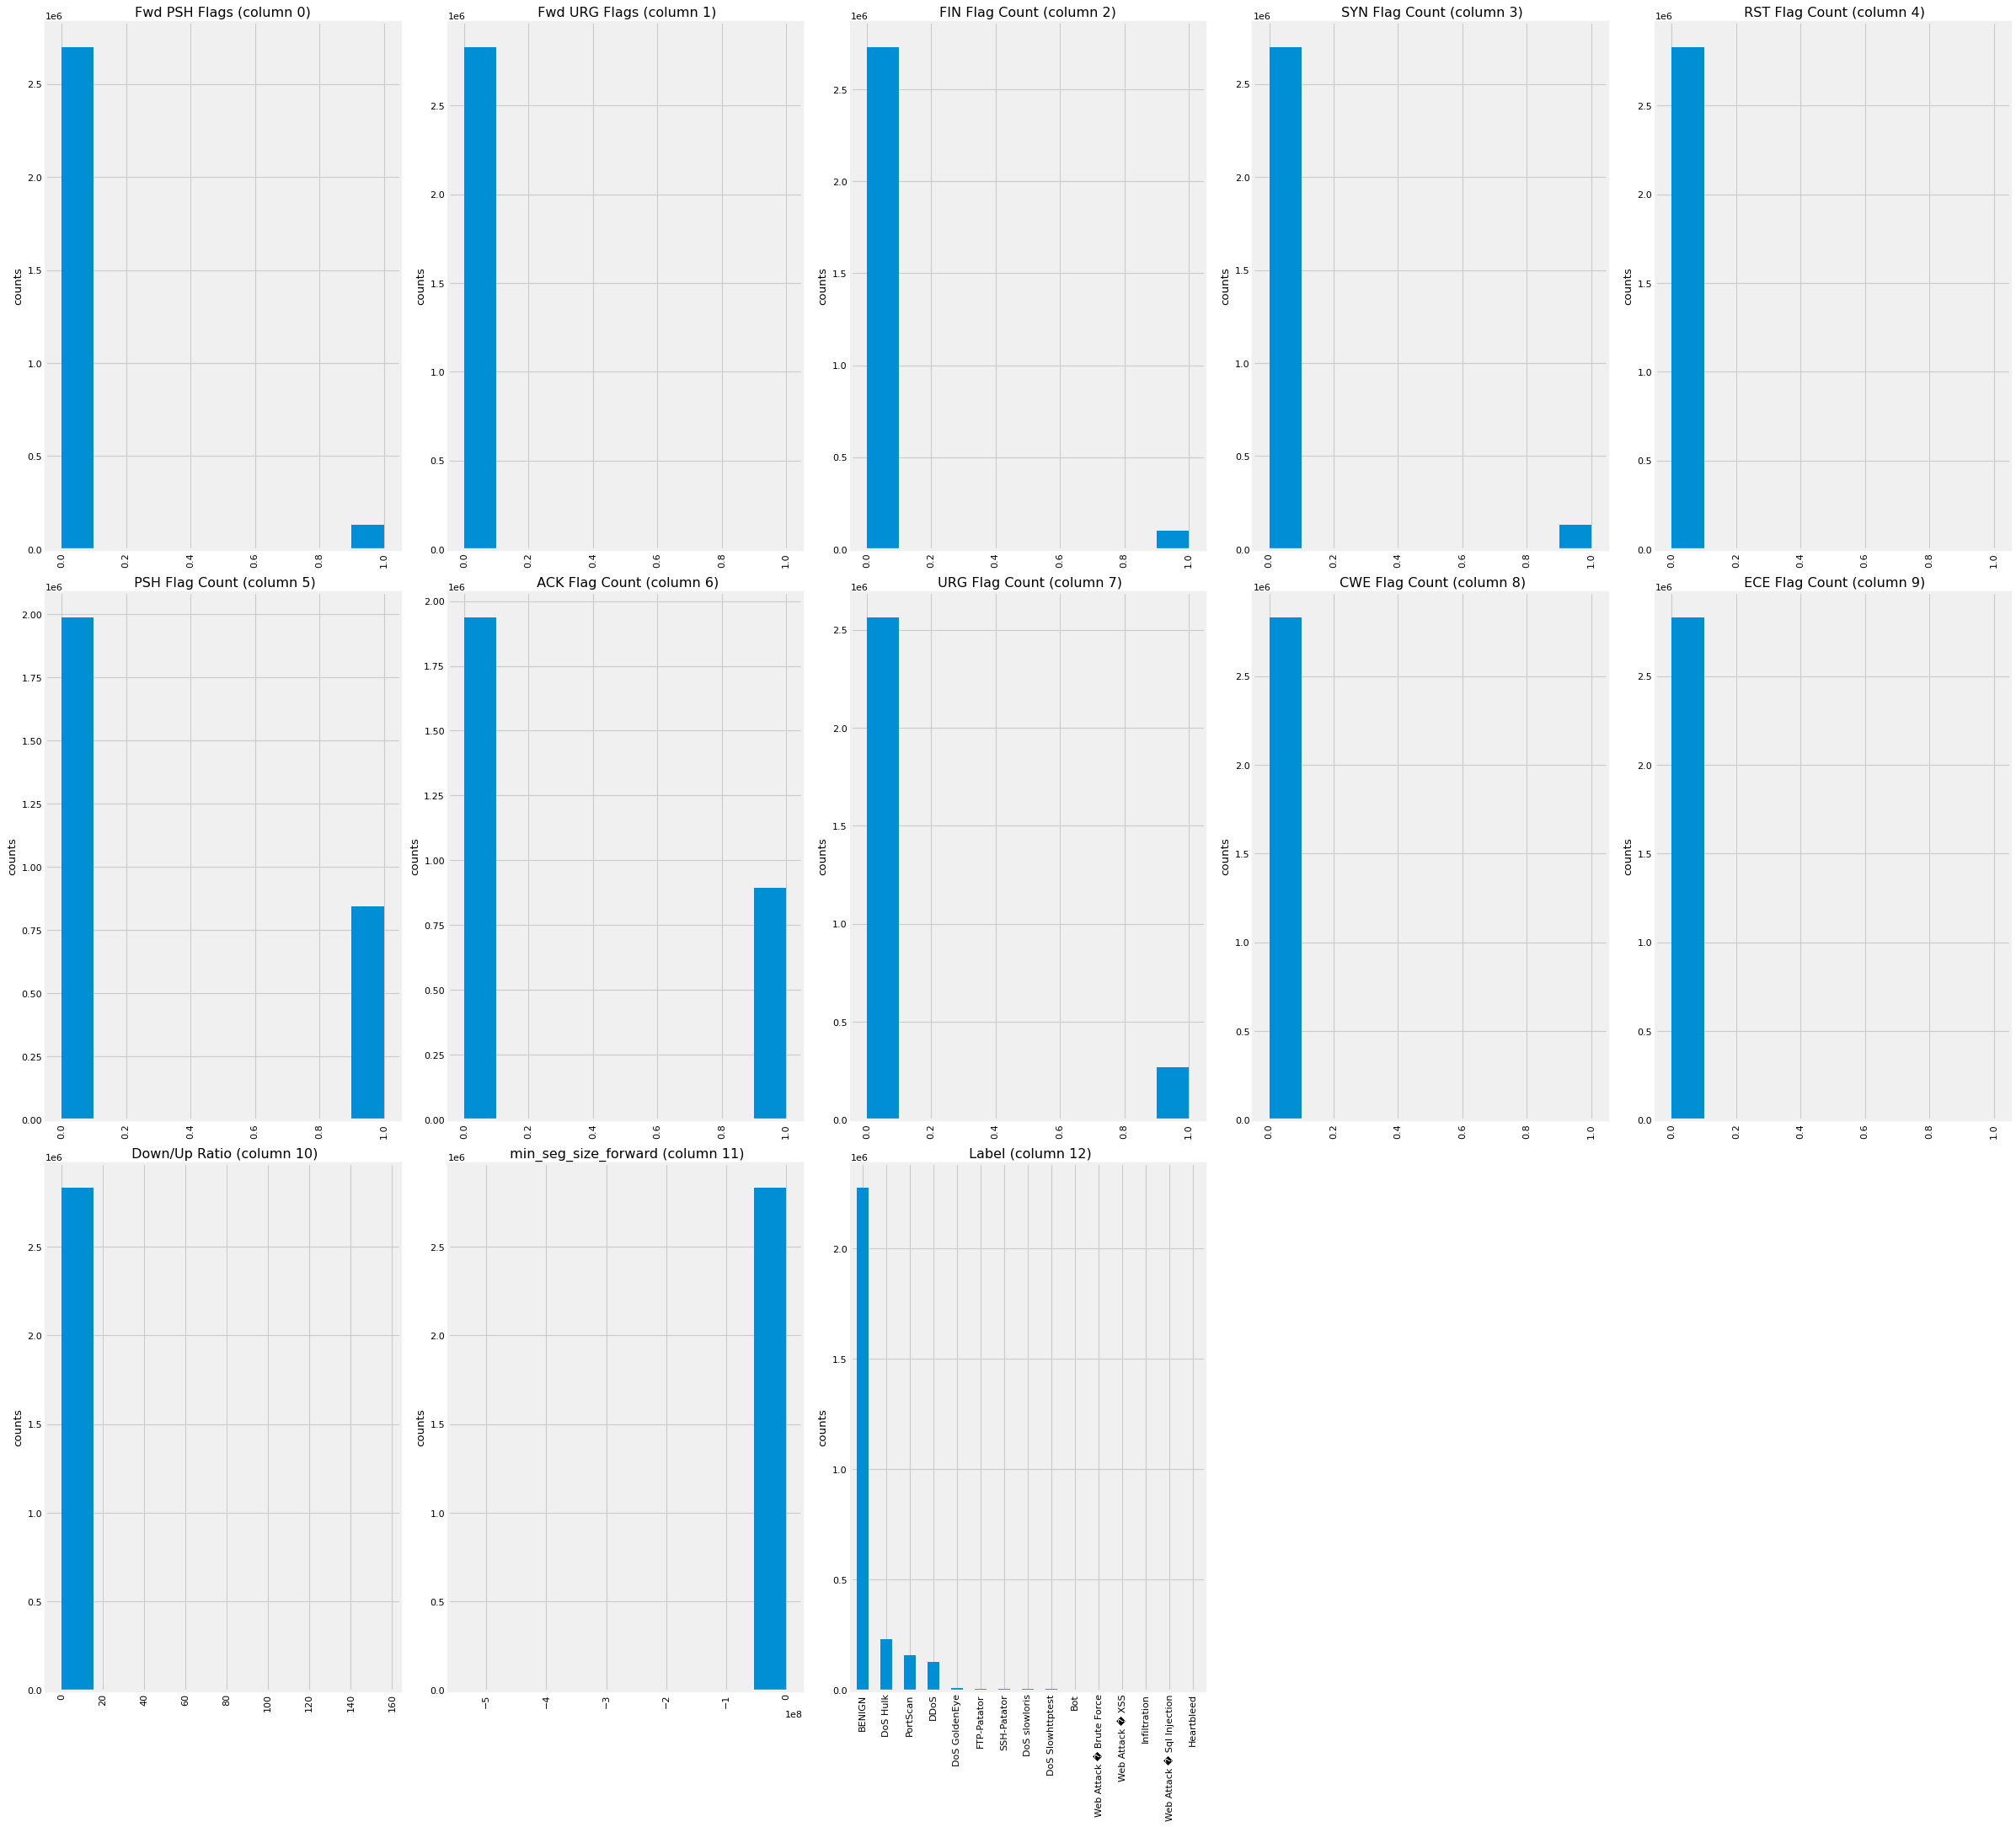

In [ ]:
plot_per_column_distribution(df, 79, 5)

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,FIN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Std,Label
0,54865,3,2,12,6,6,6.0,0,0,4.000000e+06,666666.687500,3.0,0.0,3,3,3.0,0.0,3,0,0.0,0.0,0,0,0,0,40,0,0.000000,6,6,6.0,0.0,0,0,0,1,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,BENIGN
1,55054,109,1,6,6,6,6.0,6,6,1.100917e+05,18348.623047,109.0,0.0,109,109,0.0,0.0,0,0,0.0,0.0,0,0,0,0,20,20,9174.311523,6,6,6.0,0.0,0,0,0,1,1,1,29,256,0,20,0.0,0.0,0,0,0.0,BENIGN
2,55055,52,1,6,6,6,6.0,6,6,2.307692e+05,38461.539062,52.0,0.0,52,52,0.0,0.0,0,0,0.0,0.0,0,0,0,0,20,20,19230.769531,6,6,6.0,0.0,0,0,0,1,1,1,29,256,0,20,0.0,0.0,0,0,0.0,BENIGN
3,46236,34,1,6,6,6,6.0,6,6,3.529412e+05,58823.531250,34.0,0.0,34,34,0.0,0.0,0,0,0.0,0.0,0,0,0,0,20,20,29411.765625,6,6,6.0,0.0,0,0,0,1,1,1,31,329,0,20,0.0,0.0,0,0,0.0,BENIGN
4,54863,3,2,12,6,6,6.0,0,0,4.000000e+06,666666.687500,3.0,0.0,3,3,3.0,0.0,3,0,0.0,0.0,0,0,0,0,40,0,0.000000,6,6,6.0,0.0,0,0,0,1,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,BENIGN


In [ ]:

df_attack = df[df['Label'] != 'BENIGN']
df_benign = df[df['Label'] == 'BENIGN']

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

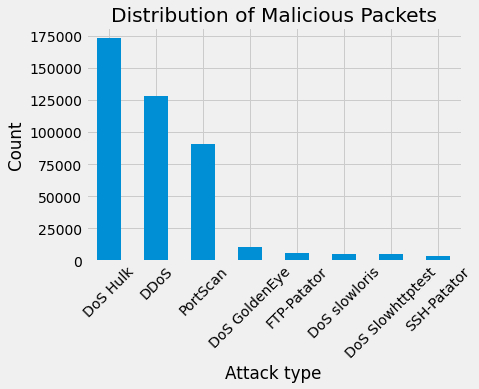

In [ ]:
labels_without_benign = df[df['Label'] != 'BENIGN']['Label']
labels_without_benign.value_counts().plot(kind='bar')
plt.title("Distribution of Malicious Packets")
plt.xlabel("Attack type")
plt.ylabel("Count")
plt.xticks(rotation=45)

In [ ]:
def distplot_comparison(df_attack, df_benign, column, **kwargs):
    plt.figure(figsize=(20, 10))
    fig, ax = plt.subplots(1,2)
    sns.distplot(df_attack[column], kde=True, color='blue', ax=ax[0], label='S', **kwargs)
    ax[0].title.set_text('BENIGN flows')
    sns.distplot(df_benign[column], kde=True, color='red', ax=ax[1], **kwargs)
    ax[1].title.set_text('ATTACK flows')
    fig.show()
    fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

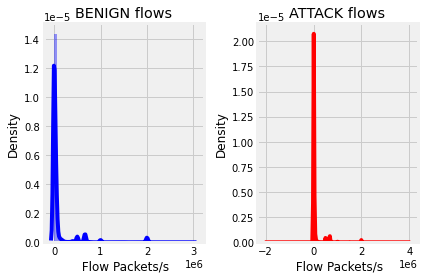

In [ ]:
distplot_comparison(df_attack, df_benign, ' Flow Packets/s')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

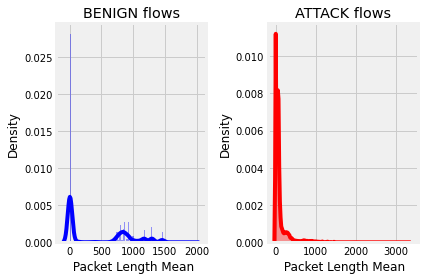

In [ ]:
distplot_comparison(df_attack, df_benign, ' Packet Length Mean', bins=100)

In [ ]:
df[' Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

Text(0.5, 1.0, 'Whisker plot (Flow Duration)')

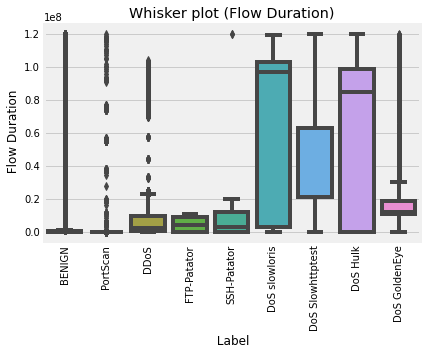

In [ ]:
sns.boxplot(x=" Label", y=" Flow Duration", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Flow Duration)")

Text(0.5, 1.0, 'Whisker plot (Flow Duration)')

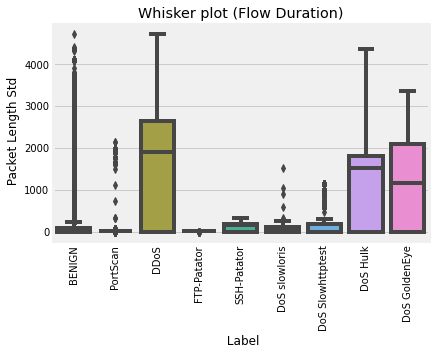

In [ ]:
sns.boxplot(x=" Label", y=" Packet Length Std", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Packet Length Std)")

Text(0.5, 1.0, 'Whisker plot (Flow Duration)')

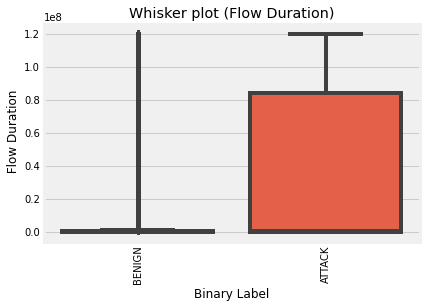

In [ ]:
sns.boxplot(x="Binary Label", y=" Flow Duration", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Flow Duration)")

Text(0.5, 1.0, 'Whisker plot (Packet Length Std)')

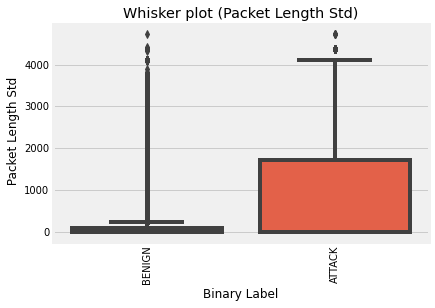

In [ ]:
sns.boxplot(x="Binary Label", y=" Packet Length Std", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Packet Length Std)")

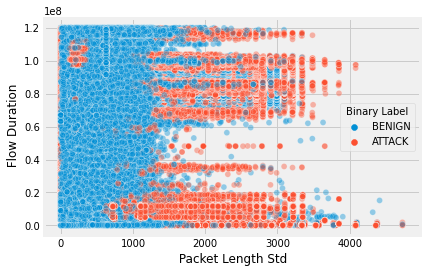

In [ ]:
sns.scatterplot(data=df, x=" Packet Length Std", y=" Flow Duration", hue='Binary Label', alpha=0.4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Packet Length Mean (log transformed)')

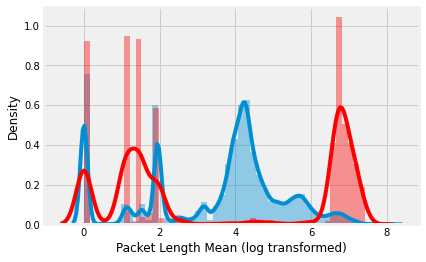

In [ ]:
sns.distplot(np.log1p(df_benign[" Packet Length Mean"]))
sns.distplot(np.log1p(df_attack[" Packet Length Mean"]), color='red')
plt.xlabel("Packet Length Mean (log transformed)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Fwd Packets (log transformed)')

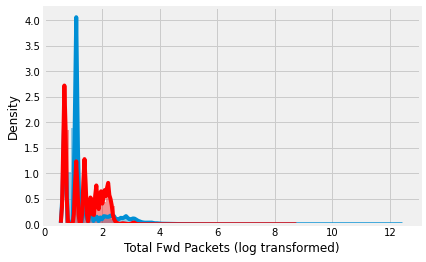

In [ ]:
sns.distplot(np.log1p(df_benign[" Total Fwd Packets"]))
sns.distplot(np.log1p(df_attack[" Total Fwd Packets"]), color='red')
plt.xlabel("Total Fwd Packets (log transformed)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Backward Packets (log transformed)')

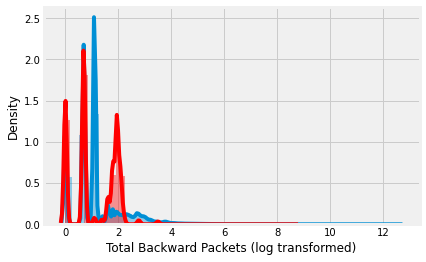

In [ ]:
sns.distplot(np.log1p(df_benign[" Total Backward Packets"]))
sns.distplot(np.log1p(df_attack[" Total Backward Packets"]), color='red')
plt.xlabel("Total Backward Packets (log transformed)")

In [ ]:
flag_columns = [col for col in df.columns if 'Flag' in col and 'Count' in col]

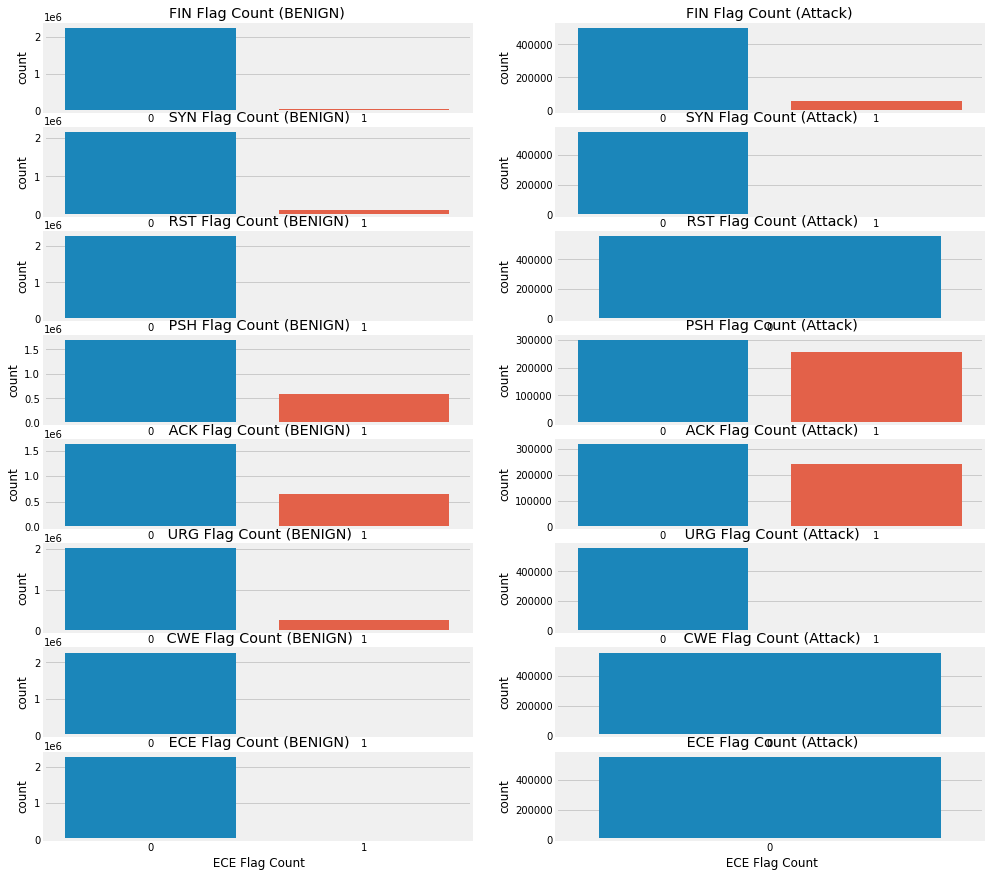

In [ ]:
fig, ax = plt.subplots(len(flag_columns), 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i, column in enumerate(flag_columns):
    sns.countplot(x=column, data=df_benign, ax=ax[i][0])
    ax[i][0].set_title(f"{column} (BENIGN)")
    sns.countplot(x=column, data=df_attack, ax=ax[i][1])
    ax[i][1].set_title(f"{column} (Attack)")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

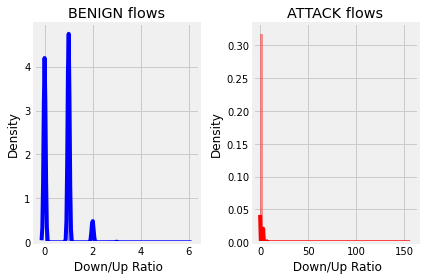

In [ ]:
distplot_comparison(df_attack, df_benign, ' Down/Up Ratio')

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
def print_statistics(df_attack, df_benign, column):
    print("ATTACK")
    print("Stats\n", df_attack[column].describe())

    print('===============================')

    print("BENIGN")
    print("Stats\n", df_benign[column].describe())


In [ ]:
print_statistics(df_attack, df_benign, ' Average Packet Size')

ATTACK
Stats
 count   556556.00000
mean       469.45248
std        552.39435
min          0.00000
25%          3.00000
50%          7.50000
75%        920.61536
max       2324.19995
Name:  Average Packet Size, dtype: float64
BENIGN
Stats
 count   2271320.00000
mean        124.16899
std         196.74306
min           0.00000
25%           9.00000
50%          74.25000
75%         124.50000
max        3893.33325
Name:  Average Packet Size, dtype: float64


Text(0.5, 1.0, 'Whisker plot (Average Packet Size)')

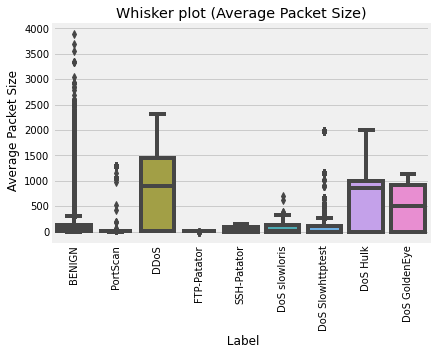

In [ ]:
sns.boxplot(x=" Label", y=" Average Packet Size", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Average Packet Size)")

Text(0.5, 1.0, 'Whisker plot (Average Packet Size)')

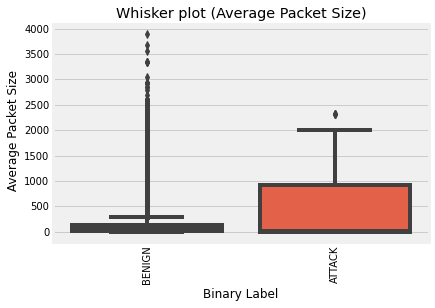

In [ ]:
sns.boxplot(x="Binary Label", y=" Average Packet Size", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Average Packet Size)")

In [ ]:
print_statistics(df_attack, df_benign, "Idle Mean")

ATTACK
Stats
 count      556556.00000
mean     26993194.00000
std      40742772.00000
min             0.00000
25%             0.00000
50%             0.00000
75%      82700000.00000
max     120000000.00000
Name: Idle Mean, dtype: float64
BENIGN
Stats
 count     2271320.00000
mean      3746742.25000
std      13411283.00000
min             0.00000
25%             0.00000
50%             0.00000
75%             0.00000
max     120000000.00000
Name: Idle Mean, dtype: float64


Text(0.5, 1.0, 'Whisker plot (Idle Mean)')

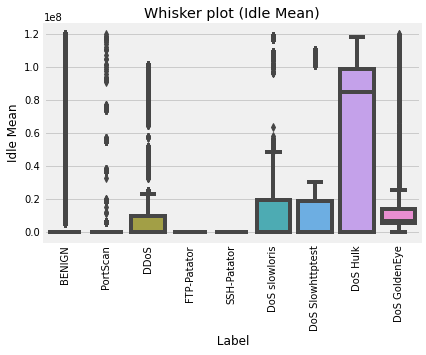

In [ ]:
sns.boxplot(x=" Label", y="Idle Mean", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Idle Mean)")

Text(0.5, 1.0, 'Whisker plot (Idle Mean)')

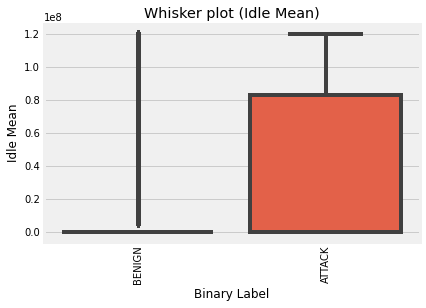

In [ ]:
sns.boxplot(x="Binary Label", y="Idle Mean", data=df)
plt.xticks(rotation=90)
plt.title("Whisker plot (Idle Mean)")

In [ ]:

X = Normalizer().fit_transform(df.drop(columns=[' Label', 'Binary Label'], axis=1))

pca = PCA(n_components=2)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

Text(0, 0.5, 'Principal Component 2')

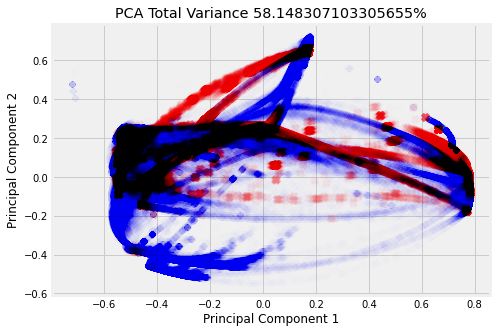

In [ ]:
labels = df['Binary Label']
marker = {'BENIGN':'o', 'ATTACK':'x'}
alpha = {'BENIGN':0.005, 'ATTACK':.05}
colors = {'ATTACK': 'red', 'BENIGN': 'blue'}
fig,ax = plt.subplots(figsize=(7,5))
for l in np.unique(labels):
    ix = np.where(labels == l)
    ax.scatter(components[ix, 0], components[ix, 1], s=40, marker=marker[l],alpha=alpha[l], color=colors[l])
plt.title(f'PCA Total Variance {total_var}%')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

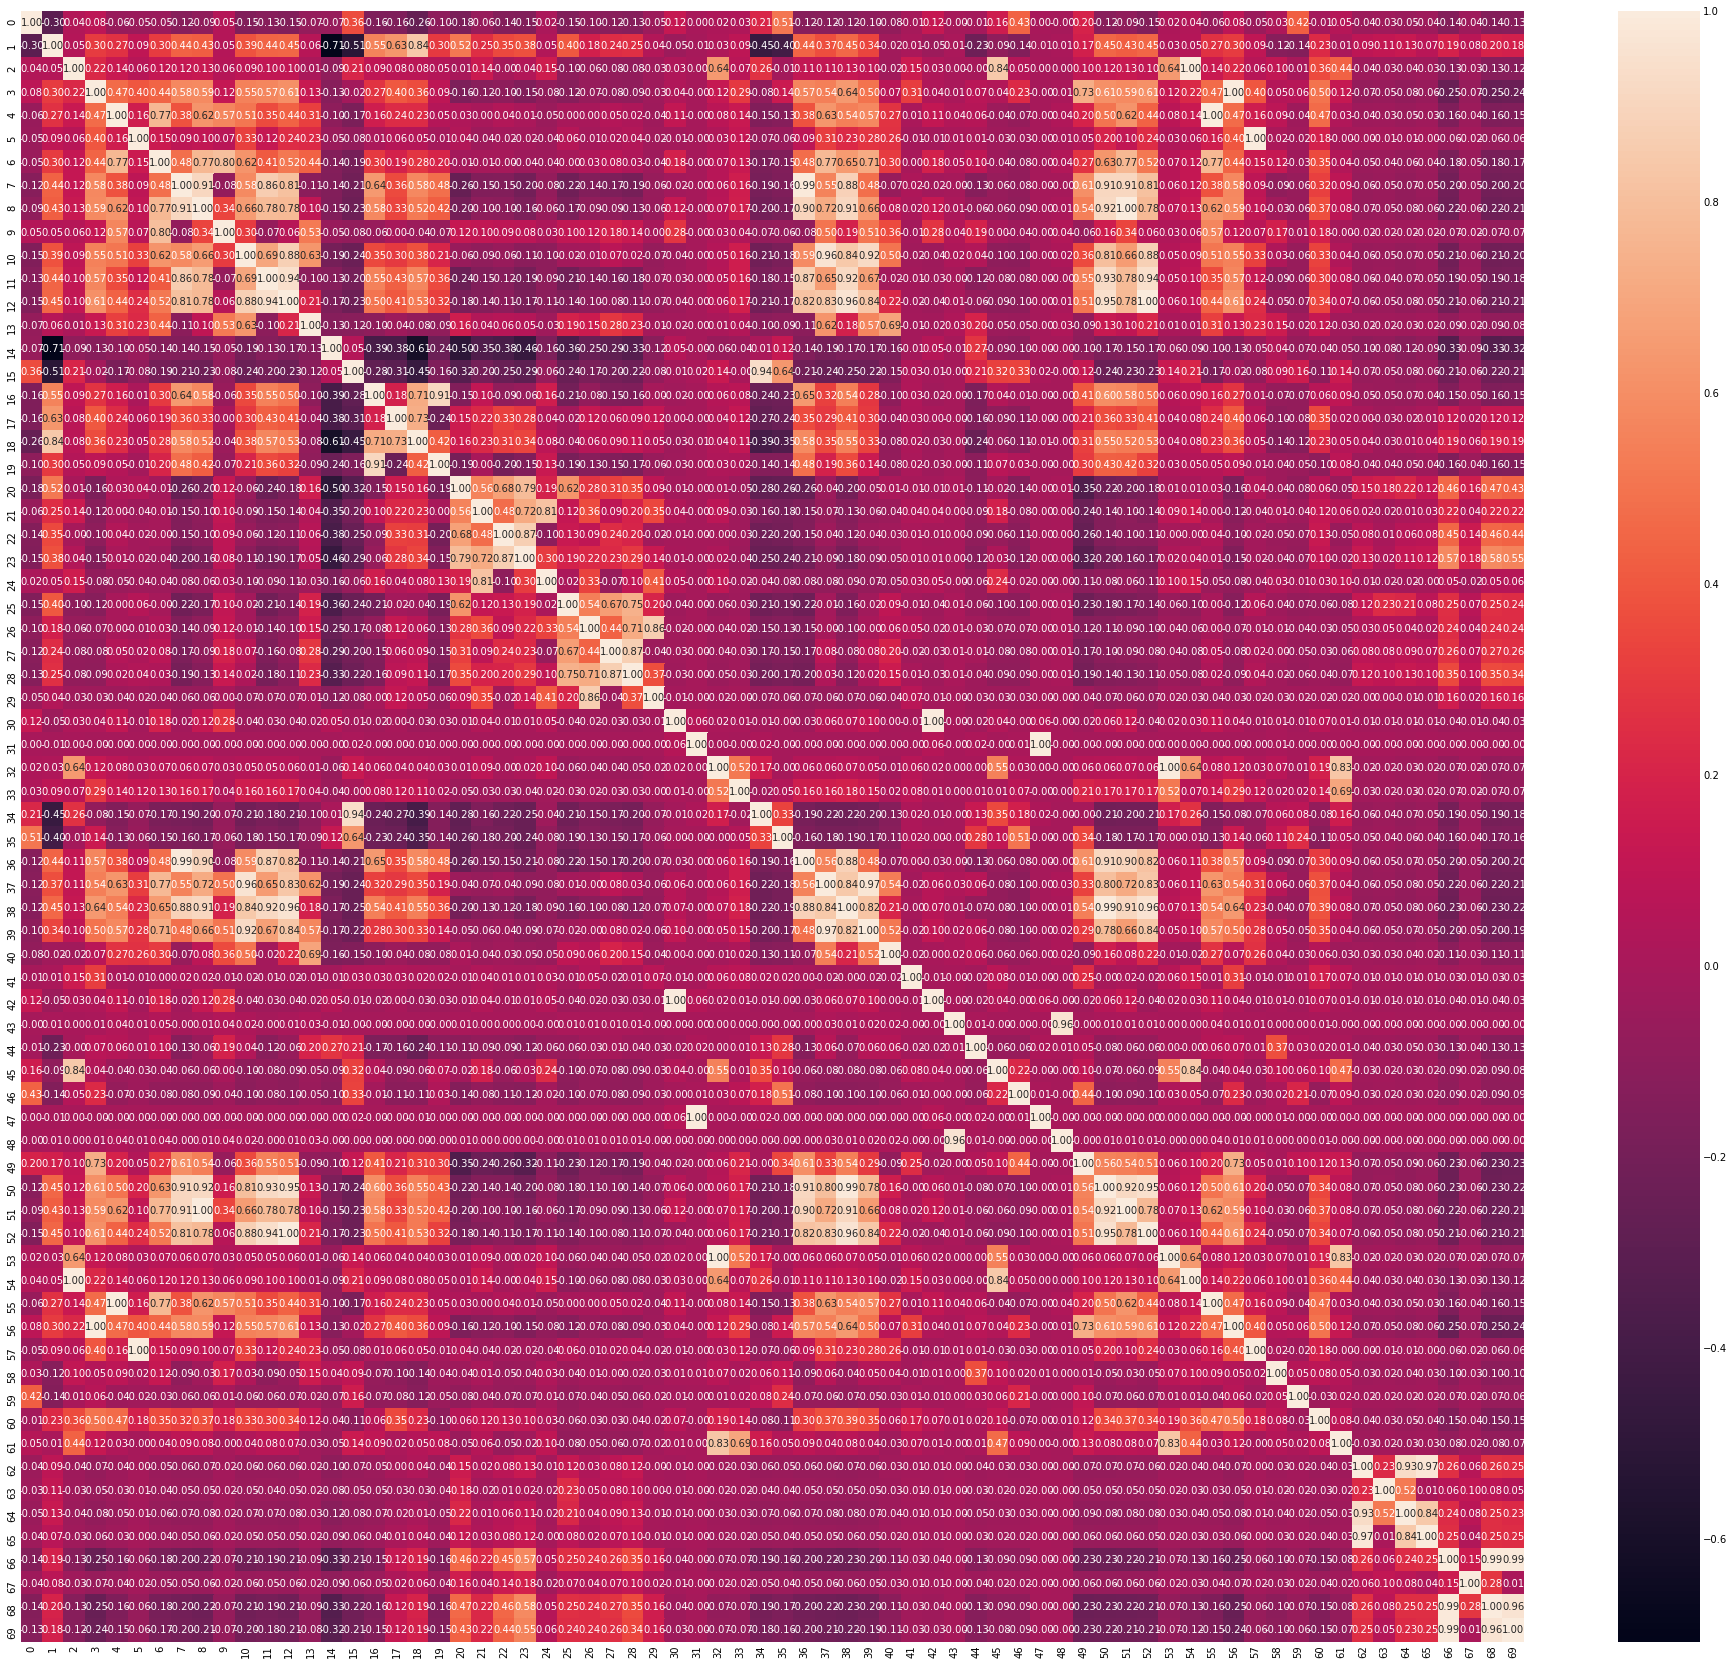

In [ ]:
columns = df.drop(columns=[' Label', 'Binary Label']).columns.values
correlation_mat = pd.DataFrame(X).corr()
plt.figure(figsize=(30, 30))
plt.xticks(range(len(correlation_mat.columns)), columns, rotation='vertical')
plt.yticks(range(len(correlation_mat.columns)), columns)
sns.heatmap(correlation_mat, annot=True, fmt=".2f")

<br>

#Tryst with sampling


In [ ]:
df_con = preprocess_dataset(pd.concat([df,df_2018]))

In [ ]:
df_con, multiClassLabels = preprocess_for_binary_classification(df_con)

In [ ]:
X = df_con.drop(["Label"], axis=1)
y = df_con["Label"]

labelEncoderBinary = LabelEncoder()
labelEncoderBinary.fit(y)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Evaluate Models

def print_metrics(lebinary, original_labels, predictions, average="binary", encode=True):

    if encode:
      orig_labels = lebinary.transform(original_labels)
      preds = lebinary.transform(predictions)
    else:
      orig_labels = original_labels
      preds = predictions

    accuracy = metrics.accuracy_score(orig_labels, preds)
    precision = metrics.precision_score(orig_labels, preds, average=average)
    recall = metrics.recall_score(orig_labels, preds, average=average)
    f1 = metrics.f1_score(orig_labels, preds, average=average)
    roc_auc = metrics.roc_auc_score(orig_labels, preds, average="weighted")

    confusion_matrix = metrics.confusion_matrix(original_labels, predictions)
    
    
    print('\n============================== Model Test Results ==============================\n')
    print ("Model Accuracy: \n", accuracy)
    print("Precision Score matrix: \n", precision)
    print("Recall Score matrix: \n", recall)
    print("F1 Score matrix: \n", f1)
    print("ROC AUC Score: \n",roc_auc)
    print("Confusion matrix: \n", confusion_matrix)


In [ ]:
scores = pd.DataFrame()

In [ ]:
#Random Oversampler
ros = RandomOverSampler(random_state=42)
train_X_res, train_y_res = ros.fit_sample(train_X, train_y)
scaler = StandardScaler()

train_X_res = pd.DataFrame(scaler.fit_transform(train_X_res), columns=X.columns)
test_X_res = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

DT_Classifier_ros = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier_ros.fit(train_X_res, train_y_res)

predictions = DT_Classifier_ros.predict(test_X_res)

orig_labels = labelEncoderBinary.transform(test_y)
preds = labelEncoderBinary.transform(predictions)
accuracy = metrics.accuracy_score(orig_labels, preds)
precision = metrics.precision_score(orig_labels, preds, average="binary")
recall = metrics.recall_score(orig_labels, preds, average="binary")
f1 = metrics.f1_score(orig_labels, preds, average="binary")
roc_auc = metrics.roc_auc_score(orig_labels, preds)
scores['Random_Over_Sampler'] = [accuracy,precision,recall,f1,roc_auc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#ADASYN
ada = ADASYN(random_state=42,n_jobs=-1)
train_X_res, train_y_res = ada.fit_sample(train_X, train_y)
scaler = StandardScaler()

train_X_res = pd.DataFrame(scaler.fit_transform(train_X_res), columns=X.columns)
test_X_res = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

DT_Classifier_ada = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier_ada.fit(train_X_res, train_y_res)

predictions = DT_Classifier_ada.predict(test_X_res)

orig_labels = labelEncoderBinary.transform(test_y)
preds = labelEncoderBinary.transform(predictions)
accuracy = metrics.accuracy_score(orig_labels, preds)
precision = metrics.precision_score(orig_labels, preds, average="binary")
recall = metrics.recall_score(orig_labels, preds, average="binary")
f1 = metrics.f1_score(orig_labels, preds, average="binary")
roc_auc = metrics.roc_auc_score(orig_labels, preds)
scores['ADASYN'] = [accuracy,precision,recall,f1,roc_auc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#SMOTE
sm = SMOTE(random_state=42,n_jobs=-1)
train_X_res, train_y_res = sm.fit_sample(train_X, train_y)
scaler = StandardScaler()

train_X_res = pd.DataFrame(scaler.fit_transform(train_X_res), columns=X.columns)
test_X_res = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

DT_Classifier_sm = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier_sm.fit(train_X_res, train_y_res)

predictions = DT_Classifier_sm.predict(test_X_res)

orig_labels = labelEncoderBinary.transform(test_y)
preds = labelEncoderBinary.transform(predictions)
accuracy = metrics.accuracy_score(orig_labels, preds)
precision = metrics.precision_score(orig_labels, preds, average="binary")
recall = metrics.recall_score(orig_labels, preds, average="binary")
f1 = metrics.f1_score(orig_labels, preds, average="binary")
roc_auc = metrics.roc_auc_score(orig_labels, preds)
scores['SMOTE'] = [accuracy,precision,recall,f1,roc_auc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
ednn = EditedNearestNeighbours(random_state=42,n_jobs=-1)
train_X_res, train_y_res = ednn.fit_sample(train_X, train_y)

scaler = StandardScaler()
train_X_res = pd.DataFrame(scaler.fit_transform(train_X_res), columns=X.columns)
test_X_res = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

DT_Classifier_ednn = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier_ednn.fit(train_X_res, train_y_res)

predictions = DT_Classifier_ednn.predict(test_X_res)

orig_labels = labelEncoderBinary.transform(test_y)
preds = labelEncoderBinary.transform(predictions)
accuracy = metrics.accuracy_score(orig_labels, preds)
precision = metrics.precision_score(orig_labels, preds, average="binary")
recall = metrics.recall_score(orig_labels, preds, average="binary")
f1 = metrics.f1_score(orig_labels, preds, average="binary")
roc_auc = metrics.roc_auc_score(orig_labels, preds)
scores['Edited_Nearest_Neighbours'] = [accuracy,precision,recall,f1,roc_auc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#NearMiss
nm = NearMiss(random_state=42,n_jobs=-1)
train_X_res, train_y_res = nm.fit_sample(train_X, train_y)

scaler = StandardScaler()
train_X_res = pd.DataFrame(scaler.fit_transform(train_X_res), columns=X.columns)
test_X_res = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

DT_Classifier_nm = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier_nm.fit(train_X_res, train_y_res)

predictions = DT_Classifier_nm.predict(test_X_res)

orig_labels = labelEncoderBinary.transform(test_y)
preds = labelEncoderBinary.transform(predictions)
accuracy = metrics.accuracy_score(orig_labels, preds)
precision = metrics.precision_score(orig_labels, preds, average="binary")
recall = metrics.recall_score(orig_labels, preds, average="binary")
f1 = metrics.f1_score(orig_labels, preds, average="binary")
roc_auc = metrics.roc_auc_score(orig_labels, preds)
scores['Near_Miss'] = [accuracy,precision,recall,f1,roc_auc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Random US
rus = RandomUnderSampler(random_state=42)
train_X_res, train_y_res = rus.fit_sample(train_X, train_y)

scaler = StandardScaler()
train_X_res = pd.DataFrame(scaler.fit_transform(train_X_res), columns=X.columns)
test_X_res = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

DT_Classifier_rus = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier_rus.fit(train_X_res, train_y_res)

predictions = DT_Classifier_rus.predict(test_X_res)

orig_labels = labelEncoderBinary.transform(test_y)
preds = labelEncoderBinary.transform(predictions)
accuracy = metrics.accuracy_score(orig_labels, preds)
precision = metrics.precision_score(orig_labels, preds, average="binary")
recall = metrics.recall_score(orig_labels, preds, average="binary")
f1 = metrics.f1_score(orig_labels, preds, average="binary")
roc_auc = metrics.roc_auc_score(orig_labels, preds)
scores['Random_Under_Sampler'] = [accuracy,precision,recall,f1,roc_auc]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scores.index = ["Accuracy","Precision","Recall","F1","ROC_AUC"]

In [ ]:
scores

,Random_Over_Sampler,ADASYN,SMOTE,Near_Miss,Random_Under_Sampler,Edited_Nearest_Neighbours
Accuracy,0.968300,0.794019,0.968255,0.501347,0.969826,0.978565
Precision,0.986113,0.993346,0.985594,0.970989,0.986187,0.983466
Recall,0.976604,0.763725,0.977080,0.428426,0.978343,0.991550
F1,0.981335,0.863532,0.981318,0.594529,0.982249,0.987492
ROC_AUC,0.948299,0.866983,0.947000,0.676982,0.949315,0.947291


# IDS 2017 + IDS 2018 Dataset

We perform Binary and Multiclass classification using the models:


1.   LogisticRegression
2.   DecisionTree
3.   RandomForestClassifier
4.   XGB (stacking ensembler)



# Binary Classification

We concatenate the two DataFrames to have one single DataFrame which is used for training the models

In [ ]:
df_con = preprocess_dataset(pd.concat([df, df_2018]))

In [ ]:
df_con, multiClassLabels = preprocess_for_binary_classification(df_con)

In [ ]:
X = df_con.drop(["Label"], axis=1)
y = df_con["Label"]

labelEncoderBinary = LabelEncoder()
labelEncoderBinary.fit(y)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#Scaling numerical attributes

scaler = StandardScaler()

train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=X.columns)
test_X = pd.DataFrame(scaler.transform(test_X), columns=X.columns)

Metrics for evaluation of Model

Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$

Precision = $\frac{TP}{TP+FP}$

Recall = $\frac{TP}{TP+FN}$

F1 = $\frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$

Since dataset is imbalanced, we use also use Precision Recall score which serves as a better metric

In [ ]:
#Evaluate Models

def print_metrics(lebinary, original_labels, predictions, average="binary", encode=True):

    if encode:
      orig_labels = lebinary.transform(original_labels)
      preds = lebinary.transform(predictions)
    else:
      orig_labels = original_labels
      preds = predictions

    accuracy = metrics.accuracy_score(orig_labels, preds)
    precision = metrics.precision_score(orig_labels, preds, average=average)
    recall = metrics.recall_score(orig_labels, preds, average=average)
    f1 = metrics.f1_score(orig_labels, preds, average=average)
    roc_auc = metrics.roc_auc_score(orig_labels, preds, average="weighted")

    confusion_matrix = metrics.confusion_matrix(original_labels, predictions)
    
    
    print('\n============================== Model Test Results ==============================\n')
    print ("Model Accuracy: \n", accuracy)
    print("Precision Score matrix: \n", precision)
    print("Recall Score matrix: \n", recall)
    print("F1 Score matrix: \n", f1)
    print("ROC AUC Score: \n",roc_auc)
    print("Confusion matrix: \n", confusion_matrix)


Fitting Models

In [ ]:
import imblearn.under_sampling 

In [ ]:
imblearn.under_sampling.OneSidedSelection()

In [ ]:
def load_model(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    return model

In [ ]:
LGR_Classifier = load_model('dtc_model_bin.pkl')
DT_Classifier = load_model('dtc_model_bin.pkl')
RF_Classifier = load_model('dtc_model_bin.pkl')
_Classifier = load_model('dtc_model_bin.pkl')

**Results** for NaiveBayes are worse than a model that predicts, everything to be **BENIGN**, even if we flip the output labels

In [ ]:
NB_Classifier = GaussianNB()
NB_Classifier.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predictions = NB_Classifier.predict(test_X)
print_metrics(labelEncoderBinary, test_y, predictions)


============================== Model Test Results ==============================

Model Accuracy: 
 0.24274971128750453
Precision Score matrix: 
 0.9828938019295299
Recall Score matrix: 
 0.11456734566866936
F1 Score matrix: 
 0.2052146159482646
ROC AUC Score: 
 0.5514842426126892
Confusion matrix: 
 [[ 354922    4165]
 [1849536  239314]]


##Stacking Binary Classification

Our best result is obtained by stacking all the models, combining weak learners which are although well performing, but together into even strong learners

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
combined_data = pd.DataFrame()

combined_data["LGC"] = LGR_Classifier.predict_proba(train_X)[:, 1]
combined_data["RFC"] = RF_Classifier.predict_proba(train_X)[:, 1]
combined_data["DTC"] = DT_Classifier.predict_proba(train_X)[:, 1]

combined_test = pd.DataFrame()

combined_test["LGC"] = LGR_Classifier.predict_proba(test_X)[:, 1]
combined_test["RFC"] = RF_Classifier.predict_proba(test_X)[:, 1]
combined_test["DTC"] = DT_Classifier.predict_proba(test_X)[:, 1]

In [ ]:
XGB_Classifier = XGBClassifier(random_state=42,n_jobs=-1,max_depth=15,n_estimators=200)
XGB_Classifier.fit(combined_data, labelEncoderBinary.transform(train_y))

# Or load trained model
# XGB_Classifier = pickle.load(open("xgb_stacking_bin_proba.pkl", 'rb'))


[12:17:03] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions = labelEncoderBinary.inverse_transform(XGB_Classifier.predict(combined_test))
print_metrics(labelEncoderBinary, test_y, predictions)


============================== Model Test Results ==============================

Model Accuracy: 
 0.9826363995478642
Precision Score matrix: 
 0.9809789161794619
Recall Score matrix: 
 0.9990224286090432
F1 Score matrix: 
 0.9899184582226175
ROC AUC Score: 
 0.9431697148907305
Confusion matrix: 
 [[ 318624   40463]
 [   2042 2086808]]


##ROC Curve

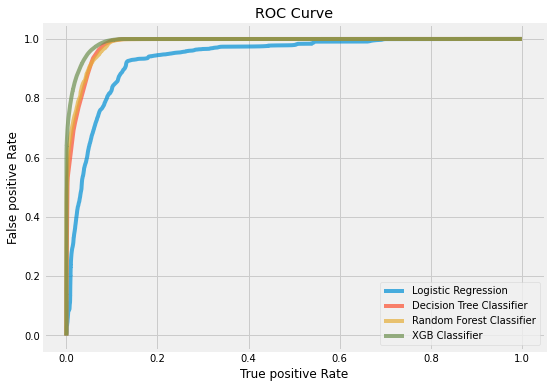

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
alpha = 0.7
metrics.plot_roc_curve(LGR_Classifier, test_X, test_y, ax=ax, alpha=alpha)
metrics.plot_roc_curve(DT_Classifier, test_X, test_y, ax=ax, alpha=alpha)
metrics.plot_roc_curve(RF_Classifier, test_X, test_y, ax=ax, alpha=alpha,)
metrics.plot_roc_curve(XGB_Classifier, combined_test, labelEncoderBinary.transform(test_y), ax=ax, alpha=alpha)

plt.xlabel("True positive Rate")
plt.ylabel("False positive Rate")
ax.legend(["Logistic Regression","Decision Tree Classifier","Random Forest Classifier","XGB Classifier"])

plt.title("ROC Curve")
plt.show()

#Pickling Binary models


In [ ]:
filename = 'xgb_stacking_bin_proba.pkl'
pickle.dump(XGB_Classifier, open(filename, 'wb'))

In [ ]:
filename = 'rfc_model_bin.pkl'
pickle.dump(RF_Classifier, open(filename, 'wb'))

In [ ]:
filename = 'dtc_model_bin.pkl'
pickle.dump(DT_Classifier, open(filename, 'wb'))

In [ ]:
filename = 'lgr_model_bin.pkl'
pickle.dump(LGR_Classifier, open(filename, 'wb'))

# Multiclass Classification

In [ ]:
#Split dataset on train and test
df_con["Label"] = multiClassLabels

X = df_con.drop(["Label"], axis=1)
y = df_con["Label"]

lb = LabelBinarizer()
lb.fit(y)
le = LabelEncoder()
le.fit(y)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Metrics for multiclass classification, using **macro** as average, which is suggested in case of severe imbalance

In [ ]:
def print_metrics(labelBinarizerObject,original_labels, predictions, average="macro",encode=True):

    
    confusion_matrix = metrics.confusion_matrix(original_labels, predictions)
    cnf_heatmap =metrics.confusion_matrix(original_labels, predictions,normalize="true")

    if encode:
      original_labels = labelBinarizerObject.transform(original_labels)
      predictions = labelBinarizerObject.transform(predictions)

    accuracy = metrics.accuracy_score(original_labels, predictions)
    precision = metrics.precision_score(original_labels, predictions, average=average)
    recall = metrics.recall_score(original_labels, predictions, average=average)
    f1 = metrics.f1_score(original_labels, predictions, average=average)
    roc_auc = metrics.roc_auc_score(original_labels,predictions,average = average,multi_class="ovo")

    

    
    print('\n============================== Model Test Results ==============================\n')
    print ("Model Accuracy: \n", accuracy)
    print("Precision Score matrix: \n", precision)
    print("Recall Score matrix: \n", recall)
    print("F1 Score matrix: \n", f1)
    print("ROC AUC Score: \n",roc_auc)
    print("Confusion matrix: \n", confusion_matrix)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title('Confusion matrix of the classifier')
    labels = list(y.value_counts().keys())
    cnf_heatmap =metrics.confusion_matrix(test_y, predictions,labels=labels,normalize="true")
    sns.heatmap(cnf_heatmap)
    

    ax.set_xticklabels(labels,rotation=90)
    ax.set_yticklabels(labels,rotation=40)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [ ]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=42)
LGR_Classifier.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
LGR_Classifier = pickle.load(open("lgr_model.pkl", 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Model Test Results ==============================

Model Accuracy: 
 0.8697090652251263
Precision Score matrix: 
 0.7919554775674569
Recall Score matrix: 
 0.8697090652251263
F1 Score matrix: 
 0.8245473324434157
ROC AUC Score: 
 0.5905937154291486
Confusion matrix: 
 [[2066748       0       1   11691    1247    7780       6     514       0
      863       0       0]
 [  43924       0       0      17       0       4       0       0       0
        0       0       0]
 [  59658       0       0       0       0       0       0       0       0
        0       0       0]
 [  17552       0       0   20369       0     483       0       0       0
        0       0       0]
 [  13559       0       0      56     378    1324       7     184       0
        0       0       0]
 [  51330       0       0    4487       0   39597       0       0       0
        0       0       0]
 [   1341       0       0      71       0     121       0      52       0
        0       0  

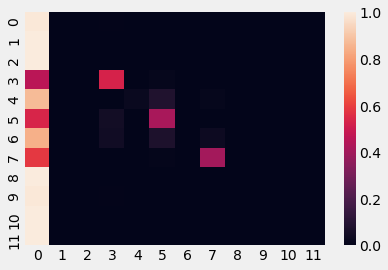

In [ ]:
predictions = LGR_Classifier.predict(test_X)
print_metrics(lb,test_y, predictions, average="weighted")


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Model Test Results ==============================

Model Accuracy: 
 0.8697090652251263
Precision Score matrix: 
 0.2682850917141681
Recall Score matrix: 
 0.1970337516520225
F1 Score matrix: 
 0.2149149655469411
ROC AUC Score: 
 0.564399685445107
Confusion matrix: 
 [[2066748       0       1   11691    1247    7780       6     514       0
      863       0       0]
 [  43924       0       0      17       0       4       0       0       0
        0       0       0]
 [  59658       0       0       0       0       0       0       0       0
        0       0       0]
 [  17552       0       0   20369       0     483       0       0       0
        0       0       0]
 [  13559       0       0      56     378    1324       7     184       0
        0       0       0]
 [  51330       0       0    4487       0   39597       0       0       0
        0       0       0]
 [   1341       0       0      71       0     121       0      52       0
        0       0   

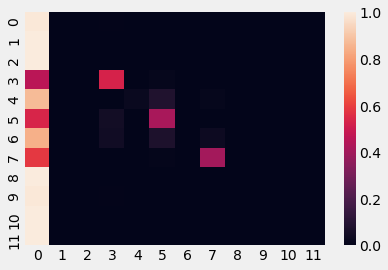

In [ ]:
predictions = LGR_Classifier.predict(test_X)
print_metrics(lb,test_y, predictions, average="macro")


In [ ]:
# Train DecisionTree Model
DT_Classifier = DecisionTreeClassifier(max_depth=10,random_state=42)
DT_Classifier.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
DT_Classifier = pickle.load(open("dtc_model.pkl", 'rb'))


============================== Model Test Results ==============================

Model Accuracy: 
 0.9805142044096723
Precision Score matrix: 
 0.9730865314200217
Recall Score matrix: 
 0.9805142044096723
F1 Score matrix: 
 0.972605287802154
ROC AUC Score: 
 0.9360816727874023
Confusion matrix: 
 [[2086970       1     321       5     440      91      30      42       0
      641     309       0]
 [   1052   42874       0       0       0       0       0       0       0
       19       0       0]
 [      3       0   59655       0       0       0       0       0       0
        0       0       0]
 [     83       0       0   38288       0      33       0       0       0
        0       0       0]
 [    572       0       0       0   14909      25       2       0       0
        0       0       0]
 [   1216       0       0       3      71   94124       0       0       0
        0       0       0]
 [    172       0       0       0       0       0    1396      17       0
        0       0   

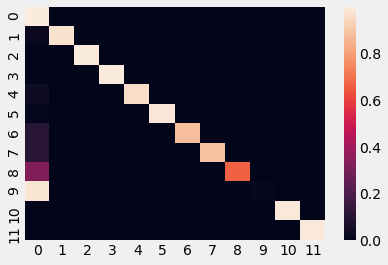

In [ ]:
predictions = DT_Classifier.predict(test_X)
print_metrics(lb,test_y, predictions, average="weighted")



============================== Model Test Results ==============================

Model Accuracy: 
 0.9805142044096723
Precision Score matrix: 
 0.9499729361091228
Recall Score matrix: 
 0.8633767372424198
F1 Score matrix: 
 0.8836408454754517
ROC AUC Score: 
 0.9263618413534935
Confusion matrix: 
 [[2086970       1     321       5     440      91      30      42       0
      641     309       0]
 [   1052   42874       0       0       0       0       0       0       0
       19       0       0]
 [      3       0   59655       0       0       0       0       0       0
        0       0       0]
 [     83       0       0   38288       0      33       0       0       0
        0       0       0]
 [    572       0       0       0   14909      25       2       0       0
        0       0       0]
 [   1216       0       0       3      71   94124       0       0       0
        0       0       0]
 [    172       0       0       0       0       0    1396      17       0
        0       0  

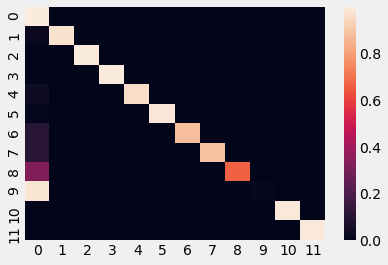

In [ ]:
predictions = DT_Classifier.predict(test_X)
print_metrics(lb,test_y, predictions, average="macro")


In [ ]:

# Train RandomForestClassifier Model
RF_Classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10, n_estimators=200)
RF_Classifier.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
RF_Classifier = pickle.load(open("rfc_model.pkl", 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Model Test Results ==============================

Model Accuracy: 
 0.9800362509329285
Precision Score matrix: 
 0.9633769777492421
Recall Score matrix: 
 0.9800362509329285
F1 Score matrix: 
 0.9715782035299858
ROC AUC Score: 
 0.9335605953188821
Confusion matrix: 
 [[2087535       0     107       2      12     884      11       0       0
        0     299       0]
 [   1067   42878       0       0       0       0       0       0       0
        0       0       0]
 [   1509       0   58149       0       0       0       0       0       0
        0       0       0]
 [     83       0       0   38321       0       0       0       0       0
        0       0       0]
 [    424       0       0       0   15062      20       1       1       0
        0       0       0]
 [   1046       0       0       0       0   94368       0       0       0
        0       0       0]
 [    246       0       0       0       3       0    1336       0       0
        0       0  

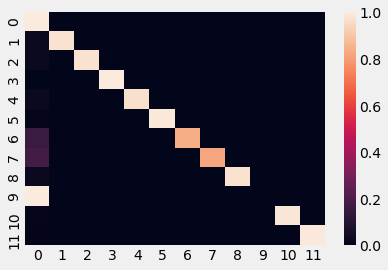

In [ ]:
predictions = RF_Classifier.predict(test_X)
print_metrics(lb,test_y, predictions, average="weighted")

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



============================== Model Test Results ==============================

Model Accuracy: 
 0.9800362509329285
Precision Score matrix: 
 0.9120826453324228
Recall Score matrix: 
 0.8774496248444024
F1 Score matrix: 
 0.8934871324656735
ROC AUC Score: 
 0.9331881953654415
Confusion matrix: 
 [[2087535       0     107       2      12     884      11       0       0
        0     299       0]
 [   1067   42878       0       0       0       0       0       0       0
        0       0       0]
 [   1509       0   58149       0       0       0       0       0       0
        0       0       0]
 [     83       0       0   38321       0       0       0       0       0
        0       0       0]
 [    424       0       0       0   15062      20       1       1       0
        0       0       0]
 [   1046       0       0       0       0   94368       0       0       0
        0       0       0]
 [    246       0       0       0       3       0    1336       0       0
        0       0  

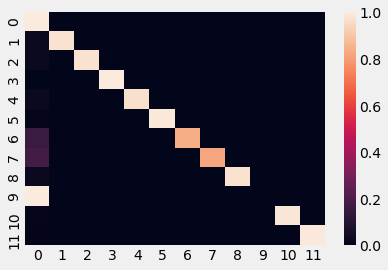

In [ ]:
predictions = RF_Classifier.predict(test_X)
print_metrics(lb,test_y, predictions, average="macro")


##Stacking

In [ ]:
combined_data = pd.DataFrame()

combined_data["LGC"] = le.transform(LGR_Classifier.predict(train_X))
combined_data["RFC"] = le.transform(RF_Classifier.predict(train_X))
combined_data["DTC"] = le.transform(DT_Classifier.predict(train_X))

combined_test = pd.DataFrame()

combined_test["LGC"] = le.transform(LGR_Classifier.predict(test_X))
combined_test["RFC"] = le.transform(RF_Classifier.predict(test_X))
combined_test["DTC"] = le.transform(DT_Classifier.predict(test_X))

In [ ]:
XGB_Classifier =  XGBClassifier(random_state=42, n_jobs=-1,max_depth = 10)
XGB_Classifier.fit(combined_data, le.transform(train_y))

[11:37:46] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGB_Classifier = pickle.load(open("xgb_stacking.pkl", 'rb'))


============================== Model Test Results ==============================

Model Accuracy: 
 0.9812290920885627
Precision Score matrix: 
 0.9536863647043301
Recall Score matrix: 
 0.8975553090417985
F1 Score matrix: 
 0.9054324385206032
ROC AUC Score: 
 0.9435974369243453
Confusion matrix: 
 [[2087425       1     321       2       9      90      27      42       0
      624     309       0]
 [   1015   42911       0       0       0       0       0       0       0
       19       0       0]
 [      3       0   59655       0       0       0       0       0       0
        0       0       0]
 [     78       0       0   38321       0       5       0       0       0
        0       0       0]
 [    419       0       0       0   15063      24       2       0       0
        0       0       0]
 [   1180       0       0       0       0   94234       0       0       0
        0       0       0]
 [    175       0       0       0       0       0    1403       7       0
        0       0  

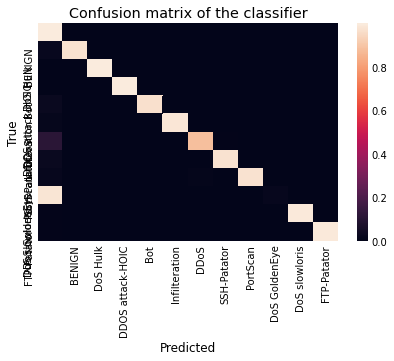

In [ ]:
predictions = le.inverse_transform(XGB_Classifier.predict(combined_test))
print_metrics(lb,test_y, predictions, average="macro")

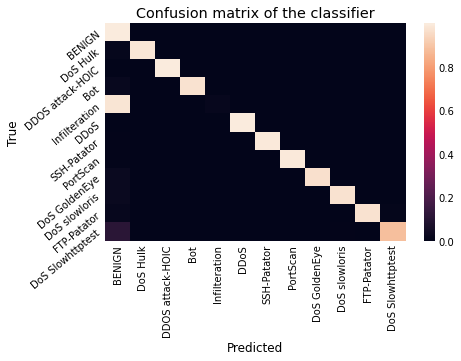

Text(0, 0.5, 'Importance')

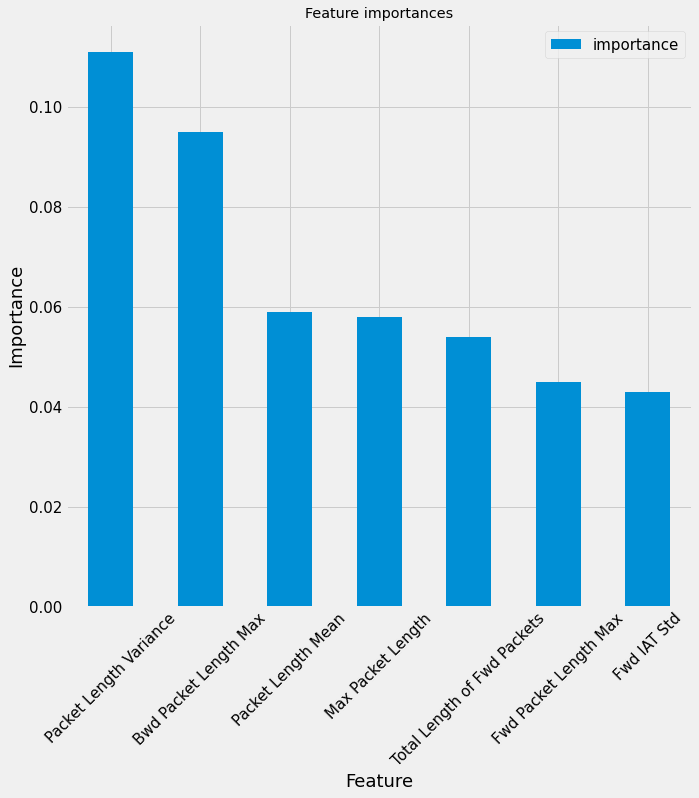

In [ ]:
# extract important features
score = np.round(RF_Classifier.feature_importances_, 3)
importances = pd.DataFrame({'feature':train_X.columns, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')


importances[:7].plot.bar()
# plot importances
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams.update({'font.size': 10})
plt.xticks(rotation=45)
plt.title("Feature importances")
plt.xlabel("Feature")
plt.ylabel("Importance")


In [ ]:
importances.head(10)

,importance
feature,
Packet Length Variance,0.111
Bwd Packet Length Max,0.089
Max Packet Length,0.065
Packet Length Mean,0.055
Total Length of Fwd Packets,0.055
Fwd IAT Std,0.045
Flow IAT Max,0.038
Fwd Packet Length Max,0.035
Bwd Header Length,0.034


#Pickling Multiclass models


In [ ]:
filename = 'xgb_stacking.pkl'
pickle.dump(XGB_Classifier, open(filename, 'wb'))

In [ ]:
filename = 'rfc_model.pkl'
pickle.dump(RF_Classifier, open(filename, 'wb'))

In [ ]:
filename = 'dtc_model.pkl'
pickle.dump(DT_Classifier, open(filename, 'wb'))

In [ ]:
filename = 'lgr_model.pkl'
pickle.dump(LGR_Classifier, open(filename, 'wb'))